In [88]:
import pandas as pd
import numpy as np
from sklearn.feature_selection import VarianceThreshold
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier

In [89]:
# Load the dataset
df = pd.read_csv('train.csv')

C:\Users\Илья\AppData\Local\Temp\ipykernel_13336\1289176308.py:2: DtypeWarning: Columns (51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,131,132,133,135,136,139,140,141,142,143,144,145,146,147,148,149,151,152,155,156,157,158,159,160,161,163,164,165,167,168,169,171,172,173,174,175,176,177,178,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,223,224,227,239,240,241,242,243,244,245,246,459,460,461,467,468,469,515,516,523,524,531,532,539,540,547,548,555,556,563,564,565,567,571,572,573,575,579,580,581,582,583,587,588,595,596,603,604,611,612,613,615,795,796,797,799,1031,1032,1033,1034,1035,1036,1037,1039,1040,1041,1042,1043,1044,1045,1047,1048,1049,1050,1051,1052,1055,1056,1057,1058,1059,1060,1063,1064,1065,1067,1068,1069,1072,1073,1074,1075,1076,1077,1078,1172,1173,1174,1176,1177,1178,1179,1180,1181,1182,1275,1276,1277,1278,1279,1280,1281,1282,1447,1448,1449,1450

In [90]:
df

,report_date,client_id,target,col1,col2,col3,col4,col5,col6,col7,...,col2654,col2655,col2656,col2657,col2658,col2659,col2660,col2661,col2662,col2663
0,2022-11-01,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.256261
1,2022-11-01,5,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,7616803.0,7616803.0,7616803.0,NaN,NaN,NaN,7616803.0,7616803.0,7616803.0,0.256261
2,2022-05-01,6,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.256261
3,2022-09-01,7,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.258682
4,2022-08-01,8,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.254164
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14451,2022-07-01,1241,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.276902
14452,2022-09-01,1969,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.260516
14453,2022-02-01,7116,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.260005
14454,2021-08-01,7117,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.256261


In [91]:
# Функция для определения дубликатов столбцов
def identify_duplicate_columns(df):
    duplicates = {}
    for column in df.columns:
        # Преобразуем столбец в строку для сравнения
        col_contents = df[column].fillna('').astype(str).values
        col_contents.sort()
        encoding = hash(tuple(col_contents))
        if encoding in duplicates:
            duplicates[encoding].append(column)
        else:
            duplicates[encoding] = [column]
    return duplicates

duplicate_columns = identify_duplicate_columns(df)

columns_to_remove = []
for duplicate_set in duplicate_columns.values():
    if len(duplicate_set) > 1:
        # Оставляем первый столбец, остальные добавляем в список для удаления
        columns_to_remove.extend(duplicate_set[1:])

# Удаляем дубликаты столбцов
df = df.drop(columns=columns_to_remove)

print(f"Исходное количество столбцов: {df.shape[1]}")
print(f"Количество удаленных столбцов: {len(columns_to_remove)}")
print(f"Количество оставшихся столбцов: {df.shape[1]}")

Исходное количество столбцов: 2210
Количество удаленных столбцов: 456
Количество оставшихся столбцов: 2210


In [92]:
# # Step 1: Remove Duplicate Columns
# # Identify columns with identical values
# duplicate_cols = []
# for i in range(len(df.columns)):
#     for j in range(i + 1, len(df.columns)):
#         if df.iloc[:, i].equals(df.iloc[:, j]):
#             duplicate_cols.append(df.columns[j])

# # Remove duplicate columns
# df = df.drop(columns=duplicate_cols)

In [93]:
df

,report_date,client_id,target,col1,col2,col3,col4,col5,col7,col8,...,col2654,col2655,col2656,col2657,col2658,col2659,col2660,col2661,col2662,col2663
0,2022-11-01,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.256261
1,2022-11-01,5,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,7616803.0,7616803.0,7616803.0,NaN,NaN,NaN,7616803.0,7616803.0,7616803.0,0.256261
2,2022-05-01,6,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.256261
3,2022-09-01,7,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.258682
4,2022-08-01,8,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.254164
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14451,2022-07-01,1241,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.276902
14452,2022-09-01,1969,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.260516
14453,2022-02-01,7116,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.260005
14454,2021-08-01,7117,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.256261


In [94]:
# Инициализация списка для хранения колонок, которые нужно удалить
columns_to_drop = []

# Определение числовых и категориальных колонок
numeric_columns = df.select_dtypes(include=['number']).columns
categorical_columns = df.select_dtypes(include=['object', 'category']).columns

# Шаг 2.1: Удаление колонок с низкой дисперсией для числовых данных
if len(numeric_columns) > 0:
    selector = VarianceThreshold(threshold=0.01)  # Порог дисперсии
    selector.fit(df[numeric_columns])
    low_variance_numeric_cols = numeric_columns[~selector.get_support()]
    columns_to_drop.extend(low_variance_numeric_cols)

# Шаг 2.2: Удаление колонок с низкой частотой категорий для категориальных данных
if len(categorical_columns) > 0:
    for col in categorical_columns:
        value_counts = df[col].value_counts(normalize=True)  # Нормализованные частоты
        if value_counts.max() > 0.95:  # Если одна категория встречается более чем в 95% строк
            columns_to_drop.append(col)

# Удаление колонок с низкой дисперсией и низкой частотой категорий
df = df.drop(columns=columns_to_drop)

print(f"Удалено колонок: {len(columns_to_drop)}")
print(f"Оставшиеся колонки: {df.columns}")

C:\Users\Илья\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\feature_selection\_variance_threshold.py:112: RuntimeWarning: Degrees of freedom <= 0 for slice.
  self.variances_ = np.nanvar(X, axis=0)


Удалено колонок: 96
Оставшиеся колонки: Index(['report_date', 'client_id', 'target', 'col1', 'col2', 'col3', 'col4',
       'col7', 'col8', 'col27',
       ...
       'col2653', 'col2654', 'col2655', 'col2656', 'col2657', 'col2658',
       'col2659', 'col2660', 'col2661', 'col2662'],
      dtype='object', length=2114)


In [95]:
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler


# Разделение числовых и категориальных колонок
numeric_columns = df.select_dtypes(include=['number']).columns
categorical_columns = df.select_dtypes(include=['object', 'category']).columns

# Шаг 1: Стандартизация данных
scaler = StandardScaler()
df[numeric_columns] = scaler.fit_transform(df[numeric_columns])

# Шаг 2: Применение LASSO
lasso = Lasso(alpha=0.01)  # Параметр регуляризации alpha
lasso.fit(df[numeric_columns], df['target'])

# Шаг 3: Выбор признаков с ненулевыми коэффициентами
selected_features = df[numeric_columns].columns[lasso.coef_ != 0]

# Удаление незначимых признаков
df = df[['report_date', 'client_id', 'target'] + selected_features.tolist()]

print(f"Оставшиеся колонки: {df.columns}")

ValueError: Input X contains NaN.
Lasso does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [ ]:
df = df.replace(-99, np.nan)
df

,report_date,client_id,target,col45,col49,col50,col51,col52,col54,col55,...,col1960,col2191,col2192,col2193,col2194,col2195,col2196,col2197,col2198,col2479
0,2022-11-01,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2022-11-01,5,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
2,2022-05-01,6,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2022-09-01,7,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
4,2022-08-01,8,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14451,2022-07-01,1241,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14452,2022-09-01,1969,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14453,2022-02-01,7116,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14454,2021-08-01,7117,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df = df.sort_values(['client_id', 'report_date'], ascending=[True, False])
df.head(50)

,report_date,client_id,target,col45,col49,col50,col51,col52,col54,col55,...,col1960,col2191,col2192,col2193,col2194,col2195,col2196,col2197,col2198,col2479
0,2022-11-01,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6471,2022-06-01,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4718,2021-12-01,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12132,2021-10-01,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8192,2023-01-01,2,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
4102,2022-11-01,2,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
13554,2022-06-01,2,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
1,2022-11-01,5,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
8786,2022-07-01,5,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
2922,2022-05-01,5,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0


<Axes: >

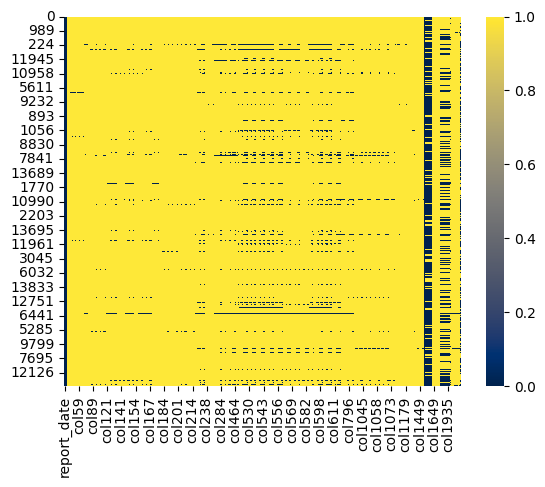

In [ ]:
# график (тепловая карта) для просмотра пропущенных значений
import seaborn as sns
sns.heatmap(df.isnull(),cmap='cividis') 

In [ ]:
# # Step 3: Remove Highly Correlated Features
# # Calculate the correlation matrix
# corr_matrix = df.iloc[:, 3:].corr().abs()
# # Create a mask for the upper triangle
# upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
# # Find features with correlation above 0.9
# to_drop = [column for column in upper.columns if any(upper[column] > 0.9)]
# # Remove highly correlated features
# df = df.drop(columns=to_drop)

In [ ]:
# # Step 4: Feature Importance using RandomForest
# # Separate features and target
# X = df.iloc[:, 3:]  # Exclude report_date, client_id, and target
# y = df['target']

# # Train a RandomForestClassifier
# clf = RandomForestClassifier(n_estimators=100, random_state=42)
# clf.fit(X, y)

# # Use feature importance to select features
# model = SelectFromModel(clf, prefit=True)
# # Get the indices of important features
# important_indices = model.get_support(indices=True)
# # Get the column names
# important_cols = X.columns[important_indices].tolist()
# # Update the dataframe
# df = df[['report_date', 'client_id', 'target'] + important_cols]

In [ ]:
df

,report_date,client_id,target,col45,col49,col50,col51,col52,col54,col55,...,col1960,col2191,col2192,col2193,col2194,col2195,col2196,col2197,col2198,col2479
0,2022-11-01,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6471,2022-06-01,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4718,2021-12-01,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12132,2021-10-01,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8192,2023-01-01,2,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14368,2022-06-01,8279,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14391,2022-12-01,8289,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14417,2023-01-01,8294,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
14434,2023-02-01,8296,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0


In [ ]:


# Step 5: (Optional) Apply Domain Knowledge for Feature Grouping
# This step would involve domain-specific aggregation or selection
# For example, grouping website interaction features
# df['website_interaction_score'] = df[['col1', 'col2', 'col3']].mean(axis=1)